In [19]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [30]:
import pandas as pd

df_economic = pd.read_excel("C:/Users/kimso/Desktop/경제지표.xlsx", "1인당 지역내총생산")
df_economic

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
경제지표,1인당 지역내총생산,1인당 지역내총생산,1인당 지역내총생산,1인당 지역내총생산,1인당 지역내총생산,1인당 지역내총생산,1인당 지역내총생산,1인당 지역내총생산,1인당 지역내총생산,1인당 지역내총생산,...,1인당 지역내총생산,1인당 지역내총생산,1인당 지역내총생산,1인당 지역내총생산,1인당 지역내총생산,1인당 지역내총생산,1인당 지역내총생산,1인당 지역내총생산,1인당 지역내총생산,1인당 지역내총생산
전국,2245,2597,2994,3548,3971,4794,5757,6519,7299,8522,...,24493,26788,27901,28793,29849,30861,32556,34042,35831,36817
서울특별시,2377,2779,3230,3701,4185,5086,6185,7049,8104,9433,...,28967,31053,32407,33312,34105,35113,37236,39356,41374,43525
부산광역시,1932,2174,2495,2829,3036,3787,4470,4795,5294,6074,...,18208,19223,19700,20554,21217,22467,23956,24815,25650,26390
대구광역시,1850,2166,2546,2845,3121,3819,4332,4725,5081,5912,...,15289,16379,17170,18078,18946,19725,20991,21602,22310,23132
인천광역시,2743,3090,3484,4131,4559,5422,6645,7066,7609,8413,...,20871,23234,23384,23770,24526,26068,27798,29120,30284,30076
광주광역시,-,-,2181,2846,3199,4002,4640,5257,5769,6703,...,17031,18667,19093,19799,20789,21944,23139,24511,25240,26660
대전광역시,-,-,-,-,3919,4815,5745,6344,6936,7442,...,18518,19950,20728,21347,21793,22497,24094,25606,26533,27135
울산광역시,-,-,-,-,-,-,-,-,-,-,...,46624,55585,61755,62242,62653,60925,62605,64021,65370,65515
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,55189,62944,49474,42572,40043,36592


In [43]:
y=df_economic.iloc[2:3]
y

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
서울특별시,2377,2779,3230,3701,4185,5086,6185,7049,8104,9433,...,28967,31053,32407,33312,34105,35113,37236,39356,41374,43525


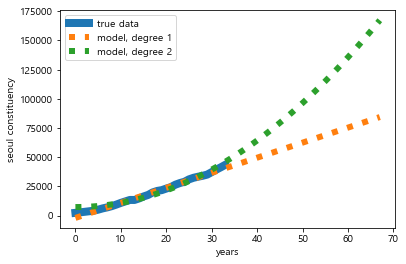

In [53]:
df_seoul=df_economic.values[2]
x=range(0,len(df_seoul))
x_longer=range(0,len(df_seoul)*2)

from sklearn.svm import SVR
import numpy as np
clf_1 = SVR(kernel='poly', C=1e3, degree=1)
clf_2 = SVR(kernel='poly', C=1e3, degree=2)

clf_1.fit(np.array(x).reshape(-1, 1), df_seoul)
clf_2.fit(np.array(x).reshape(-1, 1), df_seoul)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(x, df_seoul, linewidth=8.0, label='true data')

predicted_1_y = []
predicted_2_y = []

for i in x_longer:
       predicted_1_y.append(clf_1.predict(np.array([i]).reshape(-1, 1)))
       predicted_2_y.append(clf_2.predict(np.array([i]).reshape(-1, 1)))

plt.plot(x_longer, predicted_1_y, linewidth=6.0, ls=":", label='model, degree 1')
plt.plot(x_longer, predicted_2_y, linewidth=6.0, ls=":", label='model, degree 2')

plt.legend(loc='upper left')
plt.xlabel('years')
plt.ylabel('seoul constituency')
plt.show()
